# Classification with Logistic Regression

## The Dataset

AIM: To explain how machine learning can help in a bank marketing campaign. The goal of our classifier is to predict, using a logistic regression, if a client may subscribe to a fixed term deposit. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

The dataset contains both numerical and categorical input variables, while the response variable ('target') takes value 1 in case of 'yes' and 0 in case of 'no'.

You can read more about the data and the variables [here](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

In [1]:
# You may need these
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

##1

1. Read in the `bank_A3.csv` dataset and display the first 5 rows.
2. Print out all columns in the dataset and list categorical variables. Use the build-in function `get_dummies()` to convert all categorical variables (**exclude target variable**) to dummy variables. You may read the official explanations for more information on `get_dummies()` [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). What's the size of the dataframe after transforming it?
3. Map the target values from yes/no to 1/0. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 50.1% or 0.501).

1.1 Read the dataset and display the first 5 rows

In [2]:
# Loading in the data.
bank = pd.read_csv('Bank_A3.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,0,2143,1,0,5,may,4.35,1,-1,0,unknown,no
1,44,technician,single,secondary,0,29,1,0,5,may,2.52,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,1.27,1,-1,0,unknown,no
3,35,management,married,tertiary,0,231,1,0,5,may,2.32,1,-1,0,unknown,no
4,28,management,single,tertiary,0,447,1,1,5,may,3.62,1,-1,0,unknown,no


1.2 Print out all columns in the dataset and **list** all categorical variables in the answer part. Use the build-in function `get_dummies()` to convert all categorical variables (**excluding `target` variable**) to dummy variables. What's the size of the dataframe after transforming?

In [3]:
print("All columns are: ", bank.columns)

catCol = [col for col in bank.columns if bank[col].dtype=="O"]
print(f"\nCategorical variables are: {catCol}")
catCol.remove('target')

bank_transformed = pd.get_dummies(bank, columns=catCol)
print("\nThe size of the dataframe after  is: ", bank_transformed.size)

All columns are:  Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target'],
      dtype='object')

Categorical variables are: ['job', 'marital', 'education', 'month', 'poutcome', 'target']

The size of the dataframe after  is:  1797004


1.3 Baseline accuracy for this classification

In [4]:
bank_transformed['target'].replace('yes', 1, inplace=True)
bank_transformed['target'].replace('no', 0, inplace=True)
bank_transformed.target.value_counts()

0    36202
1     4639
Name: target, dtype: int64

baseline accuracy = 36202/(36202+4639)=0.886

##2

Split the data into train and test for the outcome/response and the predictor variables. Hold out 30% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution. Your dependent variable in the the dataset is named as `target`.

In [5]:
X = bank_transformed.drop('target', axis='columns').values
y = bank_transformed.target.values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

##3

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). 

Note:  

1. Logistic Regression uses a penalty by default. The default penalty is "l2" penalty. L2 penalty is equal to the square of the magnitude of coefficients. Thus, Logistic Regression uses ridge regression by default.  
  
    
2. If we apply a penalty during learning, the coefficients will approach to zero but not zero.  
  
    
3. If using the default settings of `LogisticRegression` in `sklearn`, we don't need to include extra 1s column because the default value already define the column of to be 1s. Thus, whatever we use a default settings or not, we still already have that column of 1s.



##4


4.1 Create a instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression.
Using this object, **run a logisitic regression analysis** of `target` (y-variable) against `age`,`default` and `balance` (x-variables) using your training data. Report the parameters of your model as indicated with the `print` function.

In [6]:
# X_p = bank[['age', 'default', 'balance']].values
# Xtrain_p, Xtest_p, ytrain_p, ytest_p = train_test_split(X_p, y, test_size=0.3, random_state=0)

BANKLR_P = LogisticRegression(penalty='none')
Xtrain4 = Xtrain[:,:3]
banklr_fit = BANKLR_P.fit(Xtrain4, ytrain)

In [7]:
print(f'The parameters of the model asociated to age, default and balance are respectively: {banklr_fit.coef_}')

The parameters of the model asociated to age, default and balance are respectively: [[ 4.79992558e-03 -1.61159655e-01  1.06077252e-04]]


In [8]:
print(f'The intercept of the model is: {banklr_fit.intercept_}')

The intercept of the model is: [-2.37537647]


4.2 Compute the label-based criteria we discussed in the Lesson for your three variables only classifier **using the test data**. Use a threshold of 0.5. (Note that you may have a warning in your code while running the performance matrix and it is designed to have it for this assignment)

In [9]:
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))


In [10]:
Xtest4 = Xtest[:,:3]
ytest_hat = banklr_fit.predict(Xtest4)
compute_performance(ytest_hat, ytest, banklr_fit.classes_)

tp: 0 tn: 10870 fp: 0 fn: 1383
Accuracy: 0.887 Recall: 0.0 Precision: nan Sensitivity: 0.0 Specificity: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


Note:  
1. There's no test instance are labeled positive.(zero)  


2. This classifier reached the baseline accuracy(the accuracy is 0.887, where the baseline accuracy is 0.886). The warning is because the first model tp and fp are 0, which is the denominator.   


3. I think this classifier may be not very useful. Considering fp and tp are both 0 here, values like sensitivity， percision are either 0, 1, or nan, which is not meaningful.  



##5
Now fit a logistic regression model with default penalty method to the training data and include all the variables in the data frame (except for `target`) in the cell below. You may want to make a new object like you did for the simpler model.

In [11]:
banklr2 = LogisticRegression(max_iter = 10000)
banklr_fit2 = banklr2.fit(Xtrain, ytrain)
print(f"Intercepts: {banklr_fit2.intercept_} \n Coefficients: {banklr_fit2.coef_}")

Intercepts: [-0.7654154] 
 Coefficients: [[-4.55948015e-03 -6.32603900e-03  3.57338536e-05 -7.36280823e-01
  -3.13064855e-01 -5.83454413e-04  2.49585075e-01 -8.84256265e-02
   2.94549208e-04  4.63807725e-02  1.21940853e-01 -2.72595144e-01
  -2.95270726e-01 -3.55752865e-01 -6.20747690e-02 -1.14303841e-01
   4.56588912e-01 -2.74613489e-01 -1.90842296e-01  4.25875197e-01
  -8.27985333e-02 -1.07475672e-01 -2.48570645e-01 -3.78800218e-01
  -1.23951509e-01 -4.27472533e-01 -2.73305211e-01 -5.05446276e-02
   2.04273470e-01 -5.93040956e-01  2.66912482e-01 -1.25554027e-01
  -7.85373214e-01 -7.32758595e-01 -5.23251371e-01  1.51087786e+00
  -9.71167984e-01 -7.46511465e-01  9.53780408e-01  7.90491020e-01
  -1.02968026e+00  1.42912225e+00 -1.15076436e+00]]


##6

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. Use a threshold of 0.5. 

In [12]:
ytest_prob = banklr2.predict_proba(Xtest)
ytest_hat = banklr2.classes_[(ytest_prob[:,1] > 0.5).astype(int)]

compute_performance(ytest_hat, ytest, banklr2.classes_)
print(f"\nThe number of test instance labeled positive is: {470 + 243}")

tp: 470 tn: 10627 fp: 243 fn: 913
Accuracy: 0.906 Recall: 0.34 Precision: 0.659 Sensitivity: 0.34 Specificity: 0.978

The number of test instance labeled positive is: 713



Note:  
There are 713 test instances are labeled positive here, and this classifier is better than the previous one, because here have positive tp and fp values. Thus, there can have meaningful sensitivity and percision values.


##7
In the cell below, predict the probability coding our own sigmoid function (NOT use the predict function from sklearn). 

In [13]:
sigmoid=lambda x: 1/ (1 + np.exp(-x))

In [14]:
# First 5 probabilities using part 4 model
z = np.dot(Xtest4, banklr_fit.coef_.T) + banklr_fit.intercept_
sigmoid(z[0:5,:])

array([[0.10115171],
       [0.10390402],
       [0.10580318],
       [0.11436477],
       [0.09866213]])

In [15]:
# First 5 probabilities using part 5 model
z = np.dot(Xtest, banklr_fit2.coef_.T) + banklr_fit2.intercept_
sigmoid(z[0:5,:])

array([[0.08053079],
       [0.02767177],
       [0.03298956],
       [0.03148386],
       [0.06937633]])

Note:  
1. The probability given by the sigmoid function will be positive.


2. The probability will be smaller, but will not change the real classification results.


##8

Plot ROC curves for both of your classifiers using the cells below.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.5642663476396591

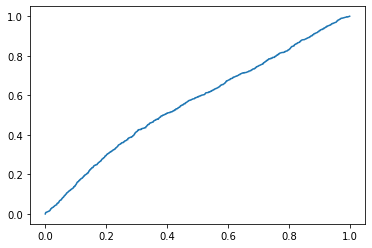

In [16]:
# ROC for the simplier classifier
import seaborn as sns
ytest_prob = banklr_fit.predict_proba(Xtest4)
fpr, tpr, _ = roc_curve(ytest, ytest_prob[:,1], pos_label=1)
ax = sns.lineplot(fpr,tpr)
auc(fpr,tpr)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.9115472344229875

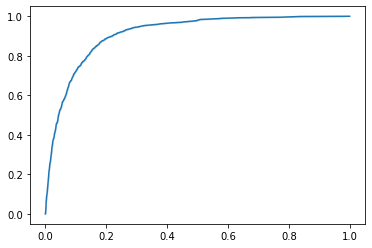

In [17]:
# ROC for all-variable classifier
ytest_prob2 = banklr2.predict_proba(Xtest)

fpr, tpr, _ = roc_curve(ytest, ytest_prob2[:,1], pos_label=1)
ax = sns.lineplot(fpr,tpr)
auc(fpr,tpr)


Note:  
1. The second one has a higher estimated probability because the auc value is higher.  

2. There should be something wrong if the auroc is below 0.5.
